# Logistic Regression
##### is the classification method that models the probability of a data itembelonging to one of the two categories

C:\Users\16175\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


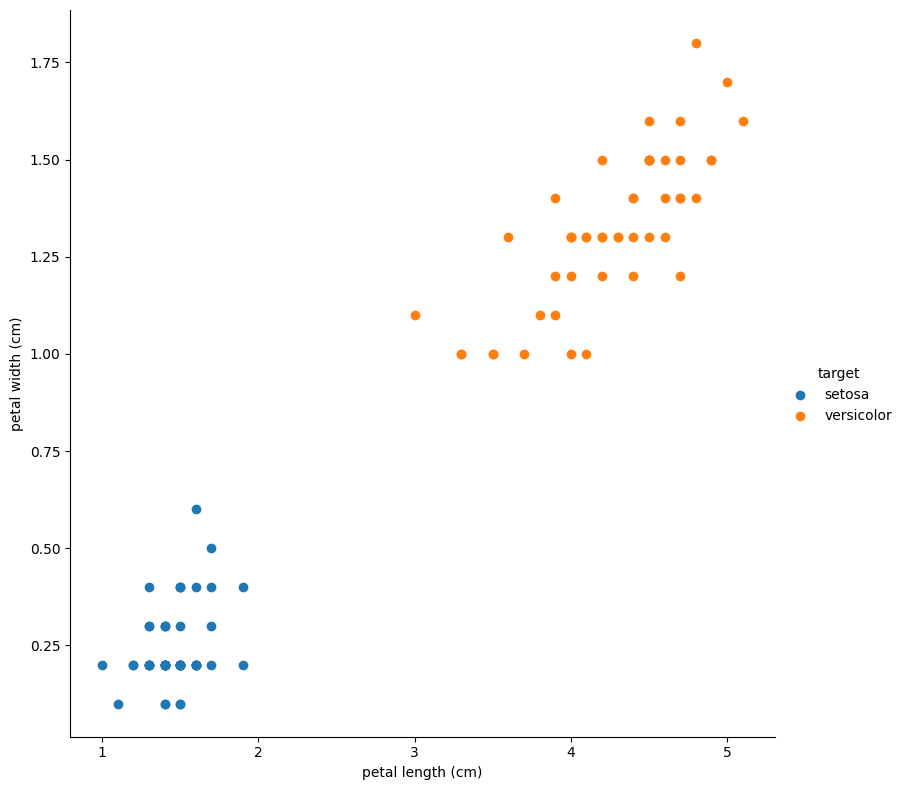

In [53]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()

iris_data =  pd.DataFrame(iris["data"],columns=iris["feature_names"])
iris_data["target"] = iris["target"]
iris_data["target"] = iris_data["target"].apply(lambda x:iris["target_names"][x])

df = iris_data.query("target=='setosa' | target=='versicolor'")
sns.FacetGrid(df,hue="target",height=8).map(plt.scatter,"petal length (cm)","petal width (cm)").add_legend()

In [31]:
logistic_regression = LogisticRegression()
X = iris_data.drop(columns=["target"])
y = iris_data["target"]
logistic_regression.fit(X,y)
x_test = [[5.6,2.4,3.8,1.2]]
logistic_regression.predict(x_test)

C:\Users\16175\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\16175\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

# Visualizing the Decision Boundary

In [52]:
df = iris_data.query("target=='setosa' | target=='versicolor'")[["sepal length (cm)","sepal width (cm)","target"]]
x = df.drop(columns=["target"]).values
y = df["target"].values

y = [1 if x =='setosa' else 0 for x in y]
logistic_regression.fit(x,y)

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

(1.0, 5.380000000000004)

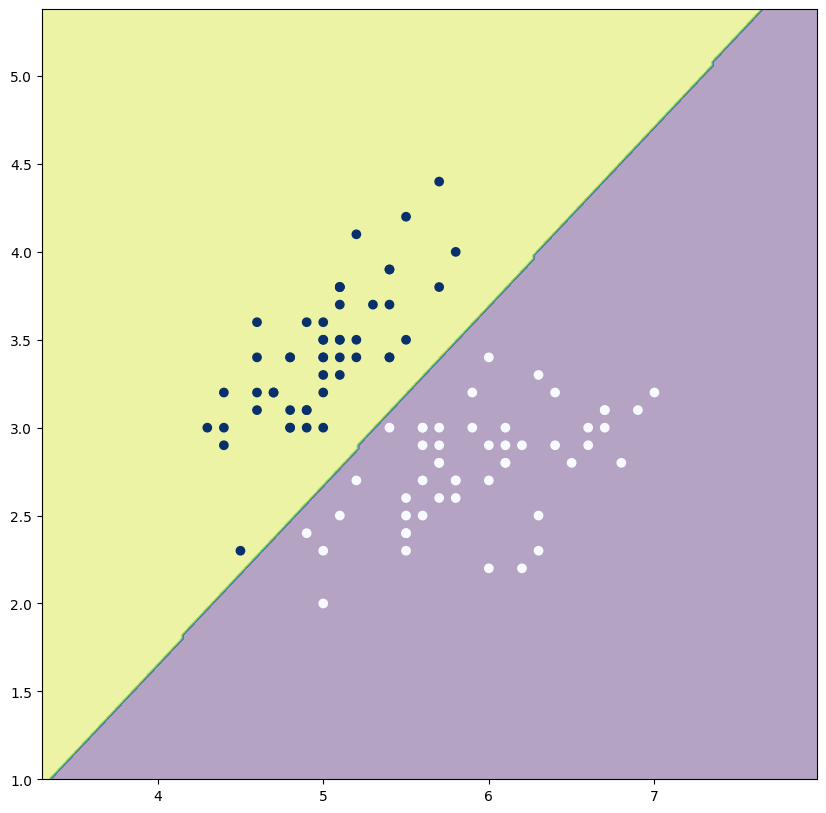

In [65]:
x_min,x_max = x[:,0].min()-1,x[:,0].max()+1
y_min,y_max = x[:,1].min()-1,x[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
Z = logistic_regression.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.rcParams["figure.figsize"]=(10,10)
plt.figure()
plt.contourf(xx,yy,Z,alpha=0.4)
plt.scatter(x[:,0],x[:,1],c = y,cmap="Blues")
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())